## <a name="section-2"></a> Simple Stereo pair theory

### Linear Camera Model

<img src="imgs/pinhole_camera_model.png" style="background : white">

By similarity of triangles we can make the perspective projection between the <u>Camera reference</u> system and the <u>Image Plane</u>:

$$
\frac{x}{X_C}=\frac{f}{Z_c} \rightarrow x = \frac{X_cf}{Z_c} \\
\frac{y}{Y_C}=\frac{f}{Z_c} \rightarrow y = \frac{Y_cf}{Z_c} 
$$

Then, from <u>Image Plane</u> in mm to <u>Sensor Plane</u> in pixels

$$
u = f_x\frac{X_c}{Z_c} + c_x\\
v = f_y\frac{Y_c}{Z_c} + c_y\\
$$

Which in homegeneus matrix is given by:

$$
\begin{bmatrix}
    u \\\
    v \\\
    1
\end{bmatrix} \equiv Z_c
\begin{bmatrix}
    u \\\
    v \\\
    1
\end{bmatrix} =
\begin{bmatrix}
    f_xX_c + c_xZ_c \\\
    f_yY_c + c_yZ_c \\\
    1
\end{bmatrix} =
\underbrace{
    \begin{bmatrix}
        f_x & 0 & c_x & 0 \\\
        0 & f_y & c_y & 0 \\\
        0 & 0 & 1 & 0
    \end{bmatrix}
}_{Intrinsic \ parameters \ [K_{3\times 3}|0]}
\begin{bmatrix}
    X_c \\\
    Y_c \\\
    Z_c \\\
    1
\end{bmatrix} 
$$

The transformation between the <u>World reference</u> system and the <u>Camera reference</u> is given by:

$$
\begin{bmatrix}
X_c \\\
Y_c \\\
Z_c
\end{bmatrix} = R_{3\times 3}
\begin{bmatrix}
X_w \\\
Y_w \\\
Z_w
\end{bmatrix} +
\begin{bmatrix}
t_x \\\
t_y \\\
t_z
\end{bmatrix}
$$

Which in homegeneus matrix is given by:

$$
\begin{equation}
    \begin{bmatrix}
    X_c \\
    Y_c \\
    Z_c \\
    1
    \end{bmatrix} = 
    \underbrace{
        \begin{bmatrix}
            R_{3 \times 3} & t_{3\times 1} \\
            0_{1\times 3} & 1 
        \end{bmatrix}
    }_{Extrinsinc \ parameters \ T_{4\times 4}}
    \begin{bmatrix}
    X_w \\
    Y_w \\
    Z_w \\
    1
    \end{bmatrix} 
\end{equation}
$$

The coordinate of a point in the world P on the Sensor plane can be achieved by combining equations (1) and (2):

$$
\begin{equation}
    \begin{bmatrix}
    u \\
    v \\
    1
    \end{bmatrix}=
    \underbrace{
            \underbrace{
                \begin{bmatrix}
                    f_x & 0 & c_x & 0 \\
                    0 & f_y & c_y & 0 \\
                    0 & 0 & 1 & 0
                \end{bmatrix}
            }_{Intrinsinc \ parameters \ [K_{3\times 3}|0]}
            \underbrace{
                \begin{bmatrix}
                    R_{3 \times 3} & t_{3\times 1} \\
                    0_{1 \times 3} & 1 
                \end{bmatrix}
            }_{Extrinsinc \ parameters \ T_{4\times 4}}
    }_{P_{3\times 4}}
    \begin{bmatrix}
    X_w \\
    Y_w \\
    Z_w \\
    1
    \end{bmatrix} 
\end{equation} 
$$

The intrinsic parameters $(f_x,f_y,c_x,c_y)$ can be found after the calibration process and are assumed to be known.

### Calibration process

The calibration consist in take pictures of an well known pattern, easy find a set of $[u^{(i)} v^{(i)} X_w^{(i)} Y_w^{(i)} Z_w^{(i)}], i=1,2,...,n$ homologue points between these pictures and solve the equation (3) for $P$. Then, factorize $P$ into $K$ and $T$. 

#### Solving for P

$$
Z_w\begin{bmatrix}
    u \\
    v \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix}
\begin{bmatrix}
    X_w \\
    Y_w \\
    Z_w \\
    1
\end{bmatrix} =
\begin{bmatrix}
    p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14} \\
    p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24} \\
    p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}
\end{bmatrix} \\

u = \frac{p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14}}{p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}} \\

v = \frac{p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24}}{p_{31}X_w + p_{32}Y_w + p_{33}Z_w + p_{34}} \\

p_{11}X_w + p_{12}Y_w + p_{13}Z_w + p_{14} - up_{31}X_w - u p_{32}Y_w - u p_{33}Z_w - u p_{34} = 0 \\

p_{21}X_w + p_{22}Y_w + p_{23}Z_w + p_{24} - vp_{31}X_w - v p_{32}Y_w - v p_{33}Z_w - v p_{34} = 0
$$

Making this as a vector multiplication we have:

$$
\begin{bmatrix}
X_w & Y_w & Z_w & 1 & 0   & 0   & 0   & 0 & -uX_w & -uY_w & -uZ_w & -u \\
0   &  0  & 0   & 0 & X_w & Y_w & Z_w & 1 & -vX_w & -vY_w & -vZ_w & -v 
\end{bmatrix}
\begin{bmatrix}
 p_{11} \\
 p_{12} \\
 p_{13} \\
 p_{14} \\
 p_{21} \\
 p_{22} \\
 p_{23} \\
 p_{24} \\
 p_{31} \\
 p_{32} \\
 p_{33} \\
 p_{34}
\end{bmatrix} = 0
$$

And for our found set we have:

$$

\begin{bmatrix}
X_w^{(1)} & Y_w^{(1)} & Z_w^{(1)} & 1 & 0   & 0   & 0   & 0 & -u^{(1)}X_w^{(1)} & -u^{(1)}Y_w^{(1)} & -u^{(1)}Z_w^{(1)} & -u^{(1)} \\
0   &  0  & 0   & 0 & X_w^{(1)} & Y_w^{(1)} & Z_w^{(1)} & 1 & -v^{(1)}X_w^{(1)} & -v^{(1)}Y_w^{(1)} & -v^{(1)}Z_w^{(1)} & -v^{(1)} \\
\vdots \\
X_w^{(n)} & Y_w^{(n)} & Z_w^{(n)} & 1 & 0   & 0   & 0   & 0 & -u^{(n)}X_w^{(n)} & -u^{(n)}Y_w^{(n)} & -u^{(n)}Z_w^{(n)} & -u^{(n)} \\
0   &  0  & 0   & 0 & X_w^{(n)} & Y_w^{(n)} & Z_w^{(n)} & 1 & -v^{(n)}X_w^{(n)} & -v^{(n)}Y_w^{(n)} & -v^{(n)}Z_w^{(n)} & -v^{(n)} \\
\end{bmatrix}
\begin{bmatrix}
 p_{11} \\
 p_{12} \\
 p_{13} \\
 p_{14} \\
 p_{21} \\
 p_{22} \\
 p_{23} \\
 p_{24} \\
 p_{31} \\
 p_{32} \\
 p_{33} \\
 p_{34}
\end{bmatrix} = 0 
$$

$$
\begin{bmatrix}A\end{bmatrix}_{n \ \times \ 12}\ \begin{bmatrix}p\end{bmatrix}_{12 \ \times\ 1}=0
$$

Which is solveable trough constrained least squares parameter estimation method. The scale of $p$ is set and the problem is transformed into <u>[A][p] tending to [0]</u> such that <u>||p||=1</u>:

$$
min (||Ap||^2) \ subject \ to \ ||p||=1
$$

$$
min (p^TA^TAp) \ subject \ to \ p^Tp=1
$$

We can define a convenient loss function we want to minimize:

$$
min = p^TA^TAp - \lambda(p^Tp -1)
$$

Taking the derivative with respect to $p$, we have:

$$
0 = 2A^TAp - 2\lambda p
$$

That is equivalent to solving the eigenvalue problem:

$$
A^TAp = \lambda p
$$

$p$ is the eigenvector corresponding to smallest eigenvalue of $A^TA$.

#### Factorizing P

$$
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} & p_{14} \\
    p_{21} & p_{22} & p_{23} & p_{24} \\
    p_{31} & p_{32} & p_{33} & p_{34}
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x & 0 \\
    0 & f_y & c_y & 0 \\
    0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
    R_{3 \times 3} & t_{3\times 1} \\
    0_{1 \times 3} & 1 
\end{bmatrix}
$$

The first $3 \times 3$ block of $P$ is:

$$
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{23} \\
    p_{31} & p_{32} & p_{33} 
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
    R\\
\end{bmatrix} = KR
$$

Where $K$ (the camera matrix) happen to be an upper triangular matrix and $R$ is a rotation matrix, thereby, orthonormal. With this, we can use *QR factorization* to compute $K$ and $R$.

The last $3 \times 1$ block of $P$ is:

$$
\begin{bmatrix}
    p_{14} \\
    p_{24} \\
    p_{34} 
\end{bmatrix} = 
\begin{bmatrix}
    f_x & 0 & c_x \\
    0 & f_y & c_y \\
    0 &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
    t_x \\
    t_y \\
    t_z
\end{bmatrix} = Kt \rightarrow t = K^{-1}\begin{bmatrix}
    p_{14} \\
    p_{24} \\
    p_{34} 
\end{bmatrix}
$$

### Simple Stereo Camera Model

<img src="imgs/SimpleStereo.png">

With a calibrated pair of cameras ($f_x,f_y,c_x,c_y$ assumed to be known), for the camera on the left and the camera on the right we have a valid equation (1):

$$
Z_l
\begin{bmatrix}
u_l \\
v_l \\
1
\end{bmatrix} =
\begin{bmatrix}
    f_x & 0 & c_x & 0 \\
    0 & f_y & c_y & 0 \\
    0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
X_l \\
Y_l \\
Z_l \\
1
\end{bmatrix} \\

Z_l
\begin{bmatrix}
u_r \\
v_r \\
1
\end{bmatrix} =
\begin{bmatrix}
    f_x & 0 & c_x & 0 \\
    0 & f_y & c_y & 0 \\
    0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
X_l-b \\
Y_l \\
Z_l \\
1
\end{bmatrix}
$$

Which solving for the left camera reference ($X_l,Y_l,Z_l$) gives us:

$$
X_l = \frac{b(u_l-c_x)}{u_l-u_r} , 
Y_l = \frac{bf_x(v_l-c_y)}{f_y(u_l-u_r)} , 
Z_l = \frac{bf_x}{u_l-u_r} , 
$$

Note the commom denominator $(u_l-u_r)$, this term is also known as disparity. Higher the horizontal diference between two homologue points (disparity), lower the depth $(z)$. The opposite is also true, if the disparity is small, the depth is higher. Imagine a point in the infinity, the disparity would be closer to zero.

Also, if the baseline is zero, the two images would be equal and disparity would be zero. As the baseline increases, the disparity increases.

Higher baselines provide more precise measure in $X_l,Y_l,Z_l$ coordinates. But too high, can decrease the number of homologue points.

## Get depth map in short way - Use OpenCv implementation

Consider the two images below:

imL | imR
--- | ---
<img src="sample_data/im0.png"> | <img src="sample_data/im1.png">|

In [58]:
# Open 
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgL = cv2.imread("sample_data/im0.png",0)
imgR = cv2.imread("sample_data/im1.png",0)

imgL = cv2.resize(imgL,(600,600))
imgR = cv2.resize(imgR,(600,600))
minDisparity = 0
numDisparities = 64

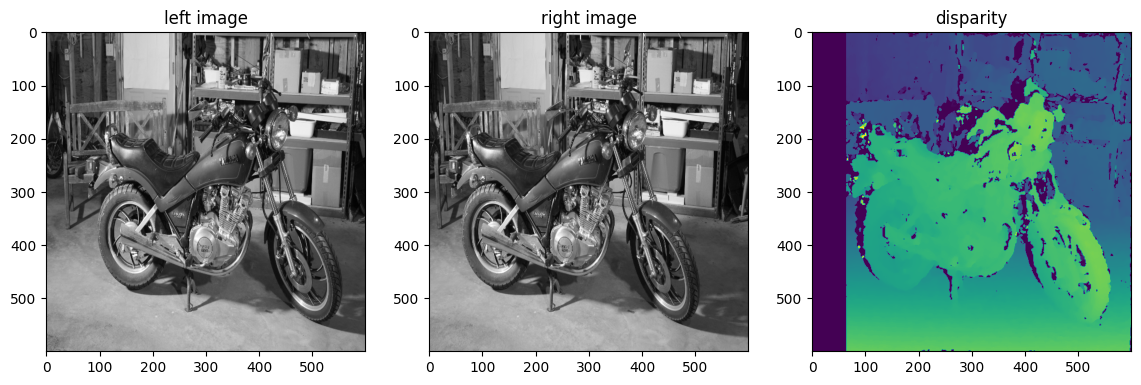

In [59]:
# Creating an object of StereoSGBM algorithm
stereo = cv2.StereoSGBM_create(
    minDisparity = minDisparity,      # important
    numDisparities = numDisparities,  # less important
    blockSize = 8,                    # important
    disp12MaxDiff = 1,
    uniquenessRatio = 10,
    speckleWindowSize = 10,
    speckleRange = 8
)

# Calculating disparith using the StereoSGBM algorithm
disp = stereo.compute(imgL, imgR).astype(np.float32)
# Scaling down the disparity values and normalizing them 
disp = (disp/16.0 - minDisparity)/numDisparities

# Displaying the disparity map
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,8))
ax1.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
ax1.set_title("left image")
ax2.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
ax2.set_title("right image")
ax3.imshow(disp)
ax3.set_title("disparity")
plt.show()

In [60]:
disp

array([[-16., -16., -16., ..., -16., -16., -16.],
       [-16., -16., -16., ..., -16., -16., -16.],
       [-16., -16., -16., ..., -16., -16., -16.],
       ...,
       [-16., -16., -16., ...,   0.,   0.,   0.],
       [-16., -16., -16., ...,   0.,   0.,   0.],
       [-16., -16., -16., ...,   0.,   0.,   0.]], dtype=float32)

## Long way